# Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
large_df = pd.read_csv("Data Science for Change School Life Survey! (Responses) - Form Responses 1.csv", low_memory = False)
large_df.T # the pandas dataframe containing the survey data is called large_df

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
Timestamp,1/24/2023 13:54:14,1/24/2023 13:54:19,1/24/2023 14:01:10,1/24/2023 14:02:17,1/24/2023 14:02:34,1/24/2023 14:08:14,1/24/2023 14:13:09,1/24/2023 14:13:34,1/24/2023 14:18:31,1/24/2023 14:19:45,...,1/25/2023 11:55:50,1/25/2023 12:53:10,1/25/2023 14:00:36,1/25/2023 18:41:01,1/25/2023 19:31:15,1/25/2023 20:24:29,1/25/2023 21:10:18,1/25/2023 22:11:01,1/25/2023 22:29:08,1/26/2023 8:31:39
What grade are you in?,Senior,Freshman,Sophomore,Sophomore,Junior,Sophomore,Sophomore,Senior,Senior,Junior,...,Freshman,Senior,Freshman,Junior,Junior,Senior,Freshman,Senior,Junior,Senior
How much sleep do you usually get on the weekends?,8,8,9 or more,8,8,6,9 or more,9 or more,9 or more,9 or more,...,9 or more,9 or more,6,8,9 or more,8,8,8,7,9 or more
How much sleep do you usually get on weekdays?,6,6,9 or more,6,7,6,7,7,8,8,...,8,8,8,6,6,7,8,6,6,7
How many hours per day do you spend on sports?,2,2,0,1,0,1,0,0,4 or more,2,...,1,3,1,1,0,2,2,2,0,0
How much time do you usually spend on homework on weekdays?,4 or more,3,1,3,2,4 or more,3,3,1,1,...,2,2,1,4 or more,4 or more,2,3,3,3,3
How much time do you usually spend on homework on weekends?,4 or more,4 or more,1,2,1,4 or more,3,2,2,3,...,3,4 or more,3,3,3,3,2,4 or more,4 or more,4 or more
How many free periods do you have?,1,0,3 or more,1,1,0,0,1,2,0,...,0,3 or more,1,1,2,1,2,1,0,2
How many honors classes do you take?,2,3,0,3,6,2,4,2,4,6,...,1,3,0,5,4,3,0,5,4,3
How many advanced honors classes do you take?,4,1,0,1,3,0,0,4,3,0,...,0,0,0,0,0,0,0,2,0,1


# Functions

In [3]:
def linear_regression(x_values, y_values):
  x_average = sum(x_values) / len(x_values)
  y_average = sum(y_values) / len(y_values)
  x_deviation = []
  y_deviation = []
  for x_value in x_values:
    x_deviation.append(x_value - x_average)
  for y_value in y_values:
    y_deviation.append(y_value - y_average)
  xx_deviation = []
  xy_deviation = []
  for i in range(len(x_values)):
    xx_deviation.append(x_deviation[i] ** 2)
    xy_deviation.append(x_deviation[i] * y_deviation[i])
  slope = sum(xy_deviation) / sum(xx_deviation)
  y_intercept = y_average - slope * x_average
  regression_error = 0
  null_hypothesis = 0
  for i in range(len(x_values)):
    predicted_value = x_values[i] * slope + y_intercept
    regression_error += (y_values[i] - predicted_value) ** 2
    null_hypothesis += (y_values[i] - y_average) ** 2
  r_squared = 1 - regression_error / null_hypothesis
  return slope, y_intercept, r_squared

def average_graph(graph):
  graph_values = list(graph.to_dict().values())[0]
  seen_indices = []
  totals = []
  counts = []
  averages = []
  for tuple_key in list(graph_values.keys()):
    if not tuple_key[0] in seen_indices:
      seen_indices.append(tuple_key[0])
      totals.append(0)
      counts.append(0)
      averages.append(0)
  for tuple_key in list(graph_values.keys()):
    totals[tuple_key[0]] += int(tuple_key[1][0]) * graph_values[tuple_key]
    counts[tuple_key[0]] += graph_values[tuple_key]
  for i in range(len(totals)):
    if counts[i] != 0:
      averages[i] = totals[i] / counts[i]
    else:
      averages[i] = 0
  avg_dict = {}
  for i, average in enumerate(averages):
    avg_dict[i] = average
  return avg_dict

# Graphs

## Weekday Sleep

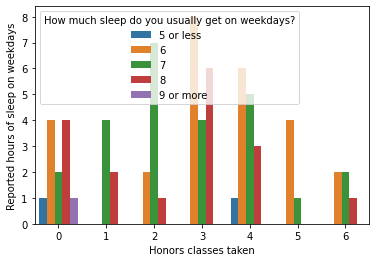

In [ ]:
wkdysleep_vs_honors_graph = sns.countplot(data = large_df.sort_values("How many honors classes do you take?"), x = "How many honors classes do you take?", hue_order = ['5 or less', '6', '7', '8', '9 or more'], hue = "How much sleep do you usually get on weekdays?");
wkdysleep_vs_honors_graph.set(xlabel="Honors classes taken",ylabel="Reported hours of sleep on weekdays")
wkdysleep_vs_honors_graph

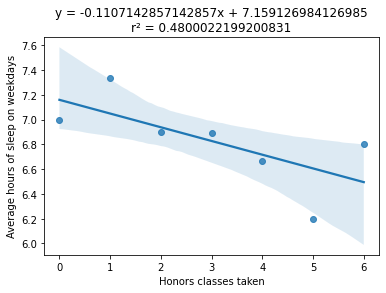

In [ ]:

sleepwkdy_vs_honors = large_df.groupby(["How many honors classes do you take?","How much sleep do you usually get on weekdays?"]).size().to_frame()
wkdy_avg_dict = average_graph(sleepwkdy_vs_honors)
average_wkdy_graph = sns.regplot(x=list(wkdy_avg_dict.keys()), y=list(wkdy_avg_dict.values()))
wkdy_slope, wkdy_y_intercept, wkdy_r_squared = linear_regression(list(wkdy_avg_dict.keys()), list(wkdy_avg_dict.values()))
average_wkdy_graph.set(xlabel="Honors classes taken",ylabel="Average hours of sleep on weekdays",title=f"y = {wkdy_slope}x + {wkdy_y_intercept}\nr² = {wkdy_r_squared}")
average_wkdy_graph

## Weekend Sleep

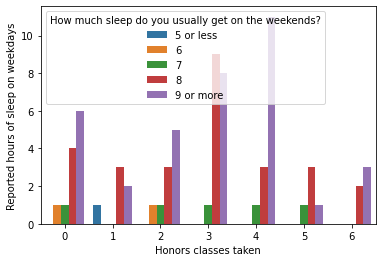

In [ ]:
wkndsleep_vs_honors_graph = sns.countplot(data = large_df.sort_values("How many honors classes do you take?"), x = "How many honors classes do you take?", hue_order = ['5 or less', '6', '7', '8', '9 or more'], hue = "How much sleep do you usually get on the weekends?");
wkndsleep_vs_honors_graph.set(xlabel="Honors classes taken",ylabel="Reported hours of sleep on weekdays")
wkndsleep_vs_honors_graph

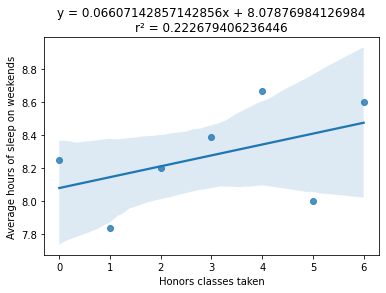

In [ ]:
sleepwknd_vs_honors = large_df.groupby(["How many honors classes do you take?","How much sleep do you usually get on the weekends?"]).size().to_frame()
wknd_avg_dict = average_graph(sleepwknd_vs_honors)
average_wknd_graph = sns.regplot(x=list(wknd_avg_dict.keys()), y=list(wknd_avg_dict.values()))
wknd_slope, wknd_y_intercept, wknd_r_squared = linear_regression(list(wknd_avg_dict.keys()), list(wknd_avg_dict.values()))
average_wknd_graph.set(xlabel="Honors classes taken",ylabel="Average hours of sleep on weekends",title=f"y = {wknd_slope}x + {wknd_y_intercept}\nr² = {wknd_r_squared}")
average_wknd_graph